<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span><ul class="toc-item"><li><span><a href="#Умножение-слева" data-toc-modified-id="Умножение-слева-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Умножение слева</a></span></li><li><span><a href="#Умножение-справа" data-toc-modified-id="Умножение-справа-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Умножение справа</a></span></li></ul></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
!pip install -qU --no-warn-script-location pandas seaborn scikit-learn 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

/usr/local/Caskroom/miniconda/base/envs/ds/lib/python3.9/site-packages/pandas/compat/_optional.py:149: UserWarning: Pandas requires version '1.3.1' or newer of 'bottleneck' (version '1.2.1' currently installed).
  warnings.warn(msg, UserWarning)


In [3]:
sns.set_theme()

In [4]:
data = pd.read_csv("/datasets/insurance.csv")
data.head(7)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
5,1,43.0,41000.0,2,1
6,1,39.0,39700.0,2,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [6]:
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


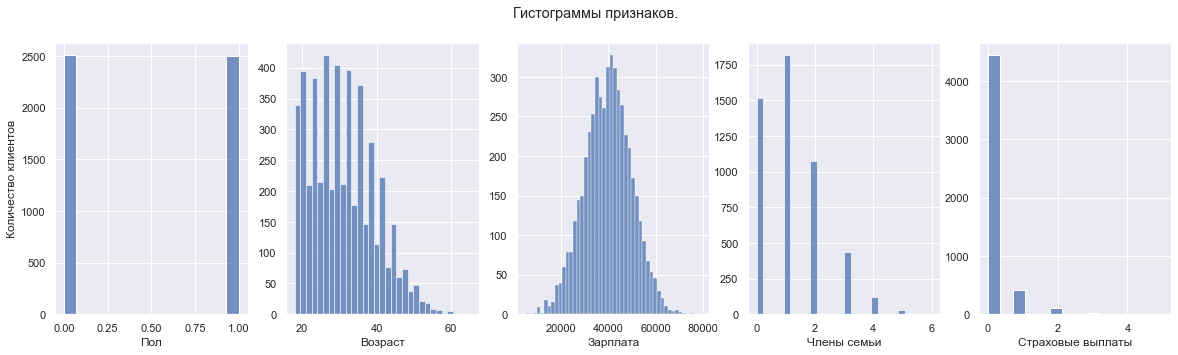

In [7]:
f, axes = plt.subplots(ncols=5, figsize=(20, 5))

for col, ax in zip(data.columns, axes):
    sns.histplot(data=data[col], ax=ax)
    ax.set_ylabel("")
axes[0].set_ylabel("Количество клиентов")
_ = f.suptitle("Гистограммы признаков.")

**Вывод**

- Данные собраны с клиентов обоих полов примерно в равных пропорциях
- Более молодых клиентов больше, чем пожилых
- Зарплаты клиентов распределены нормально
- Особо экстремальных, ошибочных, некорректных значений в данных не обнаружено 

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

__Вопрос:__ Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)
<br/>a. Изменится. Приведите примеры матриц.
<br/>b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.

### Умножение слева

**Ответ:** Домножать на обратимую матрицу слева НЕ следует. Качество модели изменится.

**Обоснование:** Во-первых, тогда размер матрицы будет зависеть от объема выборки (количества объектов в данных) и поиск большой обратимой матрицы может быть ресурсоемкой задачей.
Во-вторых, ввиду справедливых неравенств $(X^T X)^{-1} \neq  X^{-1} \cdot (X^T)^{-1}$ и $((PX)^T(PX))^{-1} \neq (PX)^{-1} \cdot ((PX)^T)^{-1}$, $X$ и $PX$ - прямоугольные матрицы и для них не существует обратных. 

Предсказания модели примут вид: $a_{P} = X_{P} w_{P} = PX \cdot (X^{T}P^{T} \cdot PX)^{-1} \cdot (PX)^T y$

### Умножение справа

**Ответ:** В сделанных предпосылках матрица $P$ - квадратная. Ее размер зависит от количества признаков и НЕ зависит от количества объектов выборки. Это полезное свойство, т.к. сложность вычислений для генерации матрицы $P$ не увеличивается с ростом объема выборки. Если матрица $P$ - невырожденная, то для нее существует обратная матрица $P^{-1}$, такая что: $PP^{-1}=P^{-1}P=E$. И преобразование признаков с помощью невырожденного линейного оператора $P$ изменит качество линейной регрессии с точностью до погрешности вычислений. 

**Обоснование:**   

Напомним формулы:
- Коэффициенты линейной регрессии **до** преобразования: $w = (X^T X)^{-1} X^T y$ 
- Предсказания линейной регрессии **до** преобразования: $a=Xw = X (X^T X)^{-1} X^T y$
- Коэффициенты линейной регрессии **после** преобразования: $w_{P} = (X_{P}^TX_{P})^{-1}X_{P}^T y =((XP)^T XP)^{-1} (XP)^T y$
- Предсказания линейной регрессии **после** преобразования: $a_{P}=X_{P}w_{P} = XP ((XP)^T XP)^{-1} (XP)^T y$

Докажем, что для невырожденной матрицы $P$, $a=a_{P}$:


$a_{P} = X_{P}w_{P} = XP ((XP)^T XP)^{-1} (XP)^T y = $

[Воспользовались свойствами матриц: $(A \cdot B)^T = B^T \cdot A^T$]<br/>
$XP (P^T(X^T X)P)^{-1} (XP)^T y = $<br/>
[Воспользовались свойствами матриц: $(A \cdot B)^{-1} = B^{-1} \cdot A^{-1}$]<br/>
$XP P^{-1}(P^T(X^TX))^{-1}P^TX^T y = $

$XP P^{-1}(X^TX)^{-1}(P^T)^{-1}P^TX^T y = $

[Воспользовались свойствами матриц: $(A^T)^{-1} = (A^{-1})^T$ и $(A \cdot B)^T = B^T \cdot A^T$]<br/>
$XP P^{-1}(X^TX)^{-1}(PP^{-1})^TX^T y = $

$XE(X^TX)^{-1}E^TX^T y = Xw =a $

Доказали, что $a=a_{P}$, где $P$ - невырожденная. Таким образом преобразование с помощью линейного невыжроденного оператора не влияет на качество регрессии.

## Алгоритм преобразования

1. Сгенерировать случайную квадратную матрицу $P$ размера равного количеству независимых признаков.
2. Проверить ее обратимость путем прямой проверки. Запустить np.linalg.inv и найти обратную матрицу $P^{-1}$. В случае ошибки перейти на шаг 1.
3. Преобразовать признаки умножением на полученную матрицу справа: $X_{P} = XP$.

## Проверка алгоритма

Напишем вспомогательную функцию для поиска обратимой матрицы.

In [8]:
rg = np.random.default_rng()

def get_operator(n_features):
    while True:
        P = rg.uniform(size=(n_features, n_features))
        try:
            P_inverse = np.linalg.inv(P)
        except:
            continue
        else:
            return P, P_inverse

Выделим зависимый и независимые признаки

In [9]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [10]:
P, P_inverse = get_operator(X.shape[1])

Обучим линейную регрессию на оригинальных и приобразованных данных для сравнения точности предсказаний.

In [11]:
model = LinearRegression()

In [12]:
model.fit(X, y)
origin_score = model.score(X, y)
print("Точность предсказаний линейной регрессии до преобразования: {}".format(origin_score))

Точность предсказаний линейной регрессии до преобразования: 0.42494550286668


In [13]:
X_encoded = X @ P
model.fit(X_encoded, y)
encoded_score = model.score(X_encoded, y)
print("Точность предсказаний линейной регрессии после преобразования: {}".format(encoded_score))

Точность предсказаний линейной регрессии после преобразования: 0.4249455028666874


In [14]:
print("Отклонение в точности предсказаний модели до и после преобразования: {:e}".format(
    abs(origin_score - encoded_score))
)

Отклонение в точности предсказаний модели до и после преобразования: 7.438494e-15


### Вывод

- Предложен алгоритм преобразования данных для сокрытия истинных значений признаков без потери качества линейной регрессии.
- Для имещихся данных, качество линейной регрессии не ухудшилось. Метрики качества до и после преобразования совпадают до 15 разрядов после запятой. 